import library

In [50]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import numpy as np

meload datasetnya

In [51]:
csv = "data.csv"
df = pd.read_csv(csv, sep=';')
print("Dataset berhasil dimuat. Ukuran:", df.shape)

Dataset berhasil dimuat. Ukuran: (4424, 37)


membuat kolom "Target" menjadi tabular

In [52]:
mapping = {"Dropout": 0, "Graduate": 1, "Enrolled": 2}
df["Target"] = df["Target"].map(mapping)
print("Kolom Target diperbaiki. Nilai unik:", df["Target"].unique())

Kolom Target diperbaiki. Nilai unik: [0 1 2]


normalisasi numerik

In [53]:
features = df.drop(columns=["Target"])
scaler = StandardScaler()
df_scaled = scaler.fit_transform(features)
print("Data berhasil dinormalisasi.")

Data berhasil dinormalisasi.


principal component analysis untuk reduksi dimensi

In [54]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
print("Rasio variansi yang dijelaskan oleh PCA:", pca.explained_variance_ratio_)

Rasio variansi yang dijelaskan oleh PCA: [0.17666395 0.0988699 ]


visualisasi PCA

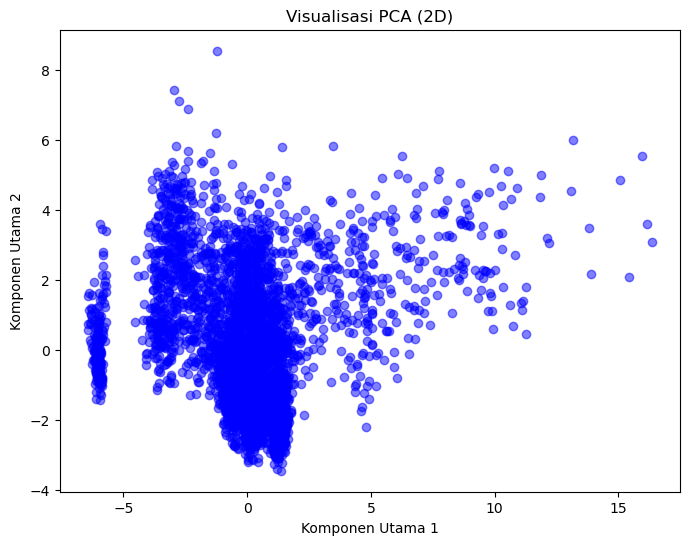

In [55]:
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.5, color='blue')
plt.xlabel("Komponen Utama 1")
plt.ylabel("Komponen Utama 2")
plt.title("Visualisasi PCA (2D)")
plt.show()

elbow untuk menentukan jumlah kluster optimal

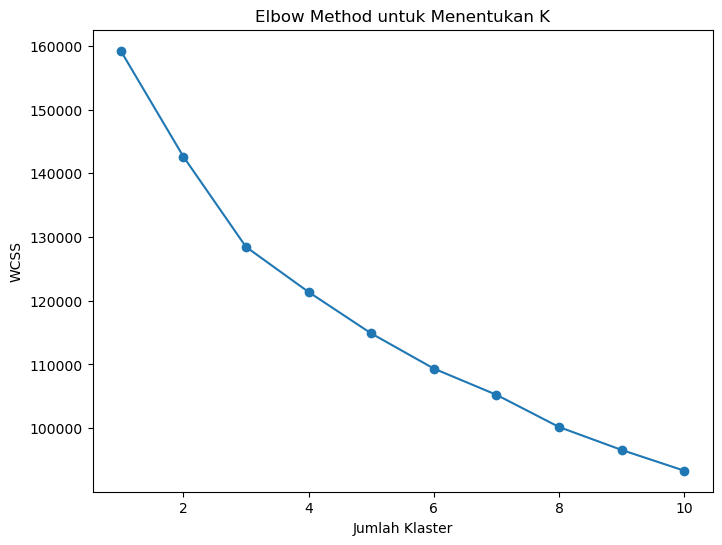

In [56]:
wcss = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, wcss, marker='o')
plt.xlabel("Jumlah Klaster")
plt.ylabel("WCSS")
plt.title("Elbow Method untuk Menentukan K")
plt.show()

k-means clustering dibagi dengan 3 klaster

In [57]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster_KMeans"] = kmeans.fit_predict(df_scaled)
print("K-Means clustering diterapkan (k=3). Jumlah klaster unik:", df["Cluster_KMeans"].unique())

K-Means clustering diterapkan (k=3). Jumlah klaster unik: [2 0 1]


eval degnan silhoutte score

In [58]:
silhouette_avg = silhouette_score(df_scaled, df["Cluster_KMeans"])
print("Silhouette Score untuk K-Means (k=3):", silhouette_avg)

Silhouette Score untuk K-Means (k=3): 0.2145170550907966


visualisasi plot silhouette untuk kmeans

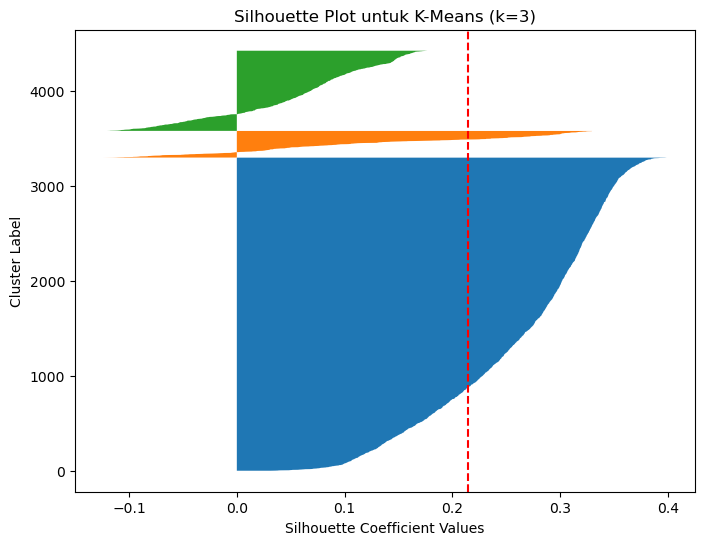

In [59]:
silhouette_values = silhouette_samples(df_scaled, df["Cluster_KMeans"])
y_lower, y_upper = 0, 0
plt.figure(figsize=(8, 6))
for i in range(3):
    cluster_silhouette_values = silhouette_values[df["Cluster_KMeans"] == i]
    cluster_silhouette_values.sort()
    y_upper += len(cluster_silhouette_values)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values)
    y_lower = y_upper
plt.axvline(x=silhouette_avg, color='red', linestyle='--')
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster Label")
plt.title("Silhouette Plot untuk K-Means (k=3)")
plt.show()

visualisasi hasil clustering k-means

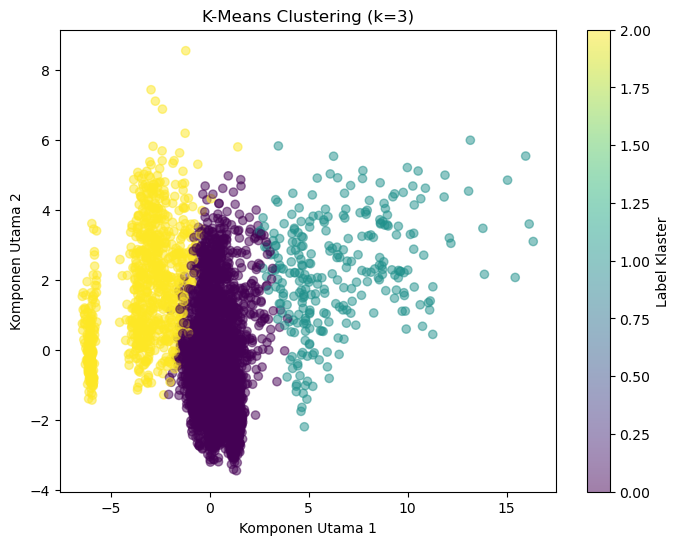

In [60]:
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df["Cluster_KMeans"], cmap="viridis", alpha=0.5)
plt.xlabel("Komponen Utama 1")
plt.ylabel("Komponen Utama 2")
plt.title("K-Means Clustering (k=3)")
plt.colorbar(label="Label Klaster")
plt.show()

Hirakhikal Clustering

Menerapkan Hierarchical Clustering...


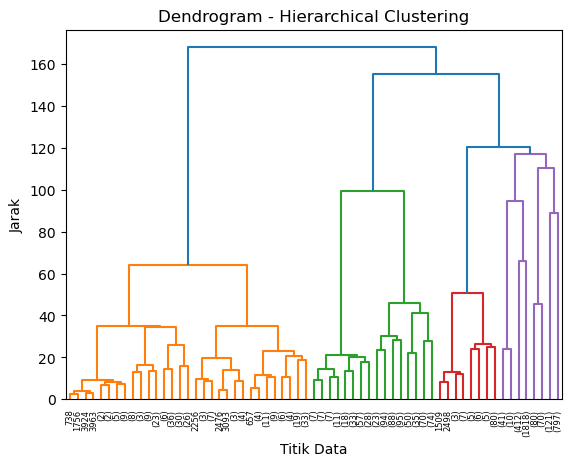

In [61]:
print("Menerapkan Hierarchical Clustering...")
dendrogram(linkage(df_scaled, method='ward'), truncate_mode="level", p=5)
plt.title("Dendrogram - Hierarchical Clustering")
plt.xlabel("Titik Data")
plt.ylabel("Jarak")
plt.show()

dbscan Clustering

In [62]:
dbscan = DBSCAN(eps=1.5, min_samples=10)
df["Cluster_DBSCAN"] = dbscan.fit_predict(df_scaled)
print("DBSCAN clustering diterapkan. Jumlah klaster unik:", df["Cluster_DBSCAN"].unique())

DBSCAN clustering diterapkan. Jumlah klaster unik: [-1  3  0  1  2]


eval dengan silhouette score untuk dbscan

Silhouette Score untuk DBSCAN: -0.27946583830861244


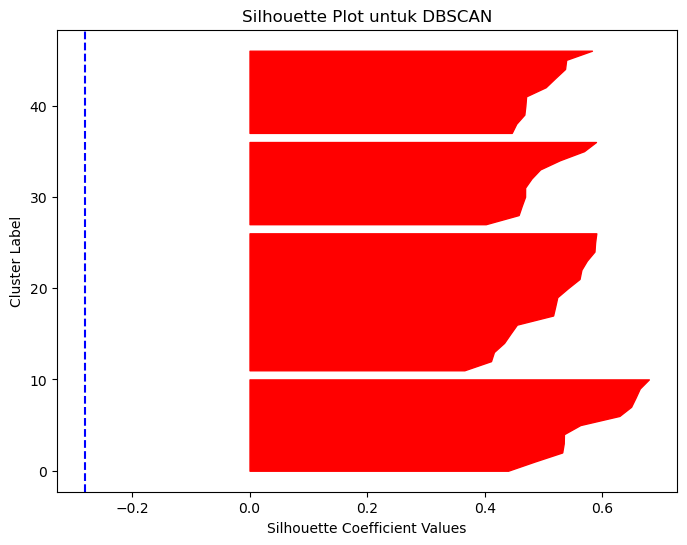

In [63]:
if len(set(df["Cluster_DBSCAN"])) > 1:
    silhouette_dbscan = silhouette_score(df_scaled, df["Cluster_DBSCAN"])
    print("Silhouette Score untuk DBSCAN:", silhouette_dbscan)
    
    # Visualisasi Silhouette Plot untuk DBSCAN
    silhouette_values_dbscan = silhouette_samples(df_scaled, df["Cluster_DBSCAN"])
    y_lower, y_upper = 0, 0
    plt.figure(figsize=(8, 6))
    for cluster in set(df["Cluster_DBSCAN"]):
        if cluster != -1:
            cluster_silhouette_values = silhouette_values_dbscan[df["Cluster_DBSCAN"] == cluster]
            cluster_silhouette_values.sort()
            y_upper += len(cluster_silhouette_values)
            plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values, color='red')
            y_lower = y_upper
    plt.axvline(x=silhouette_dbscan, color='blue', linestyle='--')
    plt.xlabel("Silhouette Coefficient Values")
    plt.ylabel("Cluster Label")
    plt.title("Silhouette Plot untuk DBSCAN")
    plt.show()
else:
    print("Silhouette Score tidak dapat dihitung untuk DBSCAN karena hanya memiliki satu klaster.")

visualisasi hasil dbscan

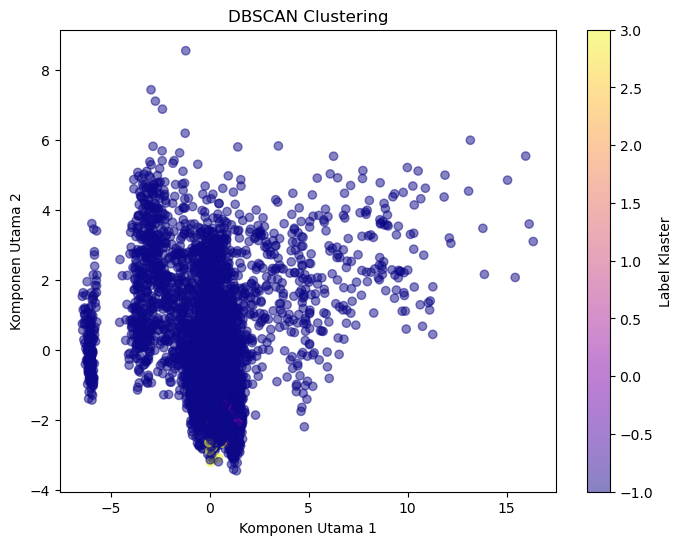

In [64]:
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df["Cluster_DBSCAN"], cmap="plasma", alpha=0.5)
plt.xlabel("Komponen Utama 1")
plt.ylabel("Komponen Utama 2")
plt.title("DBSCAN Clustering")
plt.colorbar(label="Label Klaster")
plt.show()

eksperimenku dengan parameter berbedaa

In [65]:
print("Menjalankan eksperimen clustering...")
kmeans_exp = KMeans(n_clusters=4, random_state=42, n_init=10)
df["Cluster_KMeans_Exp"] = kmeans_exp.fit_predict(df_scaled)
print("K-Means (k=4) diterapkan. Jumlah klaster unik:", df["Cluster_KMeans_Exp"].unique())

dbscan_exp = DBSCAN(eps=2.0, min_samples=10)
df["Cluster_DBSCAN_Exp"] = dbscan_exp.fit_predict(df_scaled)
print("DBSCAN (eps=2.0) diterapkan. Jumlah klaster unik:", df["Cluster_DBSCAN_Exp"].unique())

Menjalankan eksperimen clustering...
K-Means (k=4) diterapkan. Jumlah klaster unik: [1 0 2 3]
DBSCAN (eps=2.0) diterapkan. Jumlah klaster unik: [-1  8 15  0  2  4  1  5 12  3 11  7 14  6  9 10 13]


tampilkan jumlah cluster unik, kmeans dibagi dalam 4 klaster

In [66]:
print("Jumlah klaster akhir:")
print("K-Means (k=4):", df["Cluster_KMeans_Exp"].nunique())
print("DBSCAN (eps=2.0):", df["Cluster_DBSCAN_Exp"].nunique())

Jumlah klaster akhir:
K-Means (k=4): 4
DBSCAN (eps=2.0): 17


cetak hasil

In [67]:
output = "hasil_clustering.csv"
df.to_csv(output, sep=';', index=False)
print(f"Hasil clustering disimpan dalam file: {output_csv_path}")

Hasil clustering disimpan dalam file: hasil_clustering.csv
